# First thursday week of the mentioned month

In [68]:
def jupyter(otype):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    from datetime import datetime

    df_t=pd.DataFrame()
    df_b=pd.DataFrame()
    df_t['T']=pd.bdate_range('2019-01-01', '2019-01-31',freq='W-THU')
    df_b['B']=pd.bdate_range('2019-01-01', '2019-01-31',freq='B')
    df_b = df_b.set_index(['B'])
    start_date=df_t['T'][0]
    start_date=pd.to_datetime(start_date).date()

    end_date=df_t['T'][1]
    end_date=pd.to_datetime(end_date).date()

    import os
    os.chdir('C://Users/aaa/Desktop/banknifty/')
    df_d=pd.read_csv('data.csv')
    df_d=df_d.set_index(['Date'])
    df_d.index = pd.to_datetime(df_d.index)
    round_price=df_d.loc[start_date]['Close']
    x=np.round(round_price,decimals=-2)
    close_list = [x]
    addsub = [-400,-300,-200,-100,0,100,200,300,400]
    a=[[int(i+j) for j in addsub]for i in close_list]

    import glob, os    
    df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('C://Users/aaa/Desktop/banknifty/30/', "*.csv"))))
    df=df.drop(["Symbol","Settle Price","No. of contracts","Turnover in Lacs","Premium Turnover in Lacs","Open Int","Change in OI","Underlying Value"],axis=1)
    df=df[df["Option Type"] == otype ]

    edatetime_series = pd.to_datetime(df['Expiry'])
    edatetime_index = pd.DatetimeIndex(edatetime_series.values)
    df['Expiry']=edatetime_index

    ddatetime_series = pd.to_datetime(df['Date'])
    ddatetime_index = pd.DatetimeIndex(ddatetime_series.values)
    df['Date']=ddatetime_index

    df.set_index([df['Expiry'],df['Date'],'Strike Price'],inplace=True)

    asd=[pd.datetime.date(start_date+pd.offsets.BDay(i)) for i in range(6)]

    n=[df.loc[end_date].loc[asd[i]].loc[a[0][0]:a[0][-1]]['Close'] for i in range(6)]

    from functools import reduce

    df = reduce(lambda a,b: pd.merge(a,b,on='Strike Price'), n)
    df.columns = [start_date,start_date1,start_date2,start_date3,start_date4,start_date5]
    return df

In [71]:
jupyter(otype="CE")

,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10
Strike Price,,,,,,
26600,476.20,665.05,696.20,872.90,1044.45,918.45
26700,403.70,566.85,594.60,776.00,935.85,831.95
26800,338.35,491.95,507.05,677.60,845.25,725.15
26900,282.45,414.95,421.00,590.80,747.25,630.55
27000,231.65,342.30,344.15,501.15,650.75,521.35
27100,187.30,280.00,275.75,404.45,553.55,413.35
27200,148.20,221.75,214.40,317.95,458.05,318.70
27300,114.50,171.70,161.95,244.45,360.75,222.40
27400,86.75,128.25,119.50,181.60,275.05,124.15


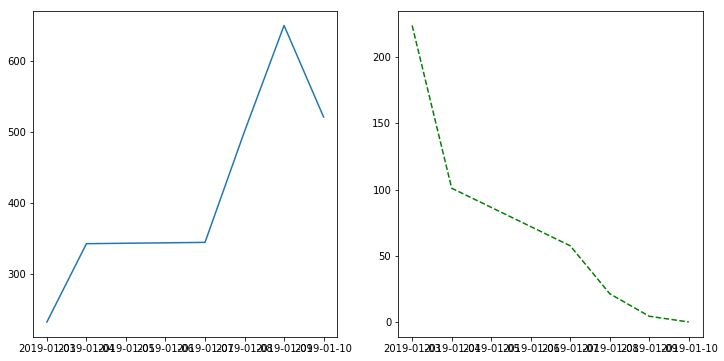

In [172]:
df_pe=jupyter(otype="PE")
df_ce=jupyter(otype="CE")
x_axis_ce = df_ce.columns.values
x_axis_pe = df_ce.columns.values
y_ce = df_ce.loc[27000].values
y_pe = df_pe.loc[27000].values
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(x_axis_ce,y_ce)
plt.subplot(1, 2, 2)
plt.plot(x_axis_pe,y_pe, 'g--')